Import Libraries

In [58]:
import pandas as pd
import numpy as np
import os
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns


Currency Codes

In [59]:
country_currency_codes_table = {
    'Burundi': 'BIF',
    'Benin': 'XOF',
    'Burkina Faso': 'XOF',
    'Central African Republic': 'XAF',
    "Côte d'Ivoire": 'XOF',
    'Cameroon': 'XAF',
    'Democratic Republic of the Congo': 'CDF',
    'Republic of Congo': 'XAF',
    'Comoros': 'KMF',
    'Eritrea': 'ERN',
    'Ethiopia': 'ETB',
    'Ghana': 'GHS',
    'Guinea': 'GNF',
    'The Gambia': 'GMD',
    'Guinea-Bissau': 'XOF',
    'Liberia': 'LRD',
    'Madagascar': 'MGA',
    'Mali': 'XOF',
    'Mozambique': 'MZN',
    'Mauritania': 'MRU',
    'Malawi': 'MWK',
    'Niger': 'XOF',
    'Rwanda': 'RWF',
    'Sudan': 'SDG',
    'Senegal': 'XOF',
    'Sierra Leone': 'SLL',
    'Somalia': 'SOS',
    'Sao Tomee and Principe': 'STN',
    'Chad': 'XAF',
    'Togo': 'XOF',
    'Tanzania': 'TZS',
    'Uganda': 'UGX',
    'Zambia': 'ZMW'
}


Read Data

In [60]:
#read in stata dataset as dataframe "country_code_df"
country_code_df = pd.read_stata("codesffactors_Mar23_2019.dta") 
country_code_df.replace('--', np.nan, inplace=True) #replace all entries that are '--' with NaN data value

country_code_df.head()

,countryname,wbctry,wbcode,wbregion,wbigroup2017,wblcat2017,hipc,emu,cemac,waemu,imfcode,imfweocode,imfweoiso,imfweoctry,region
0,Aruba,Aruba,ABW,Latin America & Caribbean,High income,NaN,0,0,0,0,NaN,314.0,ABW,Aruba,LAC
1,Afghanistan,Afghanistan,AFG,South Asia,Low income,IDA,1,0,0,0,512.0,512.0,AFG,Afghanistan,SAS
2,Angola,Angola,AGO,Sub-Saharan Africa,Lower middle income,IBRD,0,0,0,0,614.0,614.0,AGO,Angola,SSA
3,Anguilla,NaN,AIA,Latin America & Caribbean,NaN,NaN,0,0,0,0,312.0,NaN,NaN,NaN,LAC
4,Albania,Albania,ALB,Europe & Central Asia,Upper middle income,IBRD,0,0,0,0,914.0,914.0,ALB,Albania,ECA


In [61]:
region_classification_ls = country_code_df['wbregion'].unique() #get a list of region classifications
income_classification_ls = country_code_df['wbigroup2017'].unique() #get a list of income classifications
income_classification_ls = [x for x in income_classification_ls if not pd.isna(x)] # remove '--' from income_classification_ls

print(f"The region classifications are: {', '.join(country for country in region_classification_ls)}")
print(f"The income classifications are: {', '.join(country for country in income_classification_ls)}")

The region classifications are: Latin America & Caribbean, South Asia, Sub-Saharan Africa, Europe & Central Asia, Middle East & North Africa, East Asia & Pacific, North America
The income classifications are: High income, Low income, Lower middle income, Upper middle income


In [62]:
ssa_hipc_countries = country_code_df[(country_code_df['hipc'] == 1) & (country_code_df['wbregion'] == 'Sub-Saharan Africa')]
ssa_hipc_countries_ls = ssa_hipc_countries['imfweoctry'].to_list()

ssa_hipc_countries_ls

['Burundi',
 'Benin',
 'Burkina Faso',
 'Central African Republic',
 "Côte d'Ivoire",
 'Cameroon',
 'Democratic Republic of the Congo',
 'Republic of Congo',
 'Comoros',
 'Eritrea',
 'Ethiopia',
 'Ghana',
 'Guinea',
 'The Gambia',
 'Guinea-Bissau',
 'Liberia',
 'Madagascar',
 'Mali',
 'Mozambique',
 'Mauritania',
 'Malawi',
 'Niger',
 'Rwanda',
 'Sudan',
 'Senegal',
 'Sierra Leone',
 'Somalia',
 'São Tomé and Príncipe',
 'Chad',
 'Togo',
 'Tanzania',
 'Uganda',
 'Zambia']

Read in IMF's Government Finance Statistics

In [63]:
master_table = {}
folder_path = "revenue-data"

# Loop that goes through all files 'file_name' in the folder 'folder_path'
for file_name in os.listdir(folder_path):
  if file_name.endswith('.xlsx') and not file_name.startswith('~$'): #check to see if is spreadsheet .xlsx format
    raw_df = pd.read_excel(folder_path+ "/" + file_name) #read in .xlsx as dataframe
    master_table[file_name[:-5]] = raw_df #store dataframe as an entry in the master_table hash table

# master_table["Central African Republic"]
master_table["Benin"]

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Detailed Revenue Breakdown,Detailed Revenue Breakdown,NaN,NaN,NaN
1,Country: Benin,NaN,NaN,NaN,NaN
2,Sector: Budgetary central government,NaN,NaN,NaN,NaN
3,Unit: Domestic currency,NaN,NaN,NaN,NaN
4,Scale: Billions,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,NaN,2010,2011.000000,2012.000000,2013.0
7,Revenue,648.375468,676.747224,701.455221,803.0
8,Taxes,536.250675,546.563646,599.904265,696.0
9,"Taxes on income, profits, & capital gains",104.846262,114.433242,118.073622,134.3


Convert values to USD

In [64]:
#REMOVE "JUNK" ROWS AND CONVERT TO CORRECT SCALE (MILLION/BILLIONS)
for key in master_table: #loop through table (where key is the country name) (master_table[key] is the dataframe stored in the master_table indexed by key)
  scale = master_table[key].iloc[4,0] #get if values have scale of billions or millions
  
  # Drop rows 0 to 5, reformatting indexes and column headers
  master_table[key] = master_table[key].drop([0, 1, 2, 3, 4, 5]) 
  master_table[key] = master_table[key].reset_index(drop=True) 
  master_table[key].columns = master_table[key].iloc[0]
  master_table[key] = master_table[key][1:]
  master_table[key] = master_table[key].set_index(master_table[key].columns[0])
  master_table[key].columns = [int(float(col)) for col in master_table[key].columns]
  # master_table[key] = master_table[key].fillna(0)

  if scale == "Scale: Billions":
    master_table[key] = master_table[key]* (10 ** 9) #multiple every value in dataframe by 1e9 if scale is billion
  elif scale == "Scale: Millions":
    master_table[key] = master_table[key]* (10 ** 6) #multiple every value in dataframe by 1e9 if scale is billion


#FILTER OUT YEAR COLUMNS ACCOUNTING DOESNT ADD UP
#first level: make sure 'Taxes', 'Social Contributions', 'Grants, 'Other Revenue' Sums to 'Revenue'
#second level: make sure 'Taxes on income, profits, & capital gains', 'Taxes on payroll & workforce', 'Taxes on property', 'Taxes on goods & services', 'Taxes on int trade & transactions', 'Other taxes n.e.c.' sum to 'Taxes'
first_level_ls = ['Taxes', 'Social contributions', 'Grants', 'Other revenue']
second_level_ls = ['Taxes on income, profits, & capital gains', 'Taxes on payroll & workforce', 'Taxes on property', 'Taxes on goods & services', 'Taxes on int trade & transactions', 'Other taxes n.e.c.']
                  
for key in master_table:
  years_accounting_error_ls = []
  years_available = master_table[key].columns
  for year in years_available:
    country_year_df = master_table[key][year]
    revenue = 0 
    taxes = 0
    for category in first_level_ls:
      if category in country_year_df.index:
        revenue += country_year_df[category]
      # else: 
      #   print(category)
    for category in second_level_ls:
      if category in country_year_df.index:
        taxes += country_year_df[category]
    # if round(taxes, 0) != round(country_year_df['Taxes'], 0) or round(revenue, 0) != round(country_year_df['Revenue'], 0):
      
    
    margin = 0.001
    lower_bound_taxes = country_year_df['Taxes'] - country_year_df['Taxes']*margin
    upper_bound_taxes = country_year_df['Taxes'] + country_year_df['Taxes']*margin
    lower_bound_revenue = country_year_df['Revenue'] - country_year_df['Revenue']*margin
    upper_bound_revenue = country_year_df['Revenue'] + country_year_df['Revenue']*margin

    if taxes < lower_bound_taxes or taxes > upper_bound_taxes or revenue < lower_bound_revenue or revenue > upper_bound_revenue:
    
      print(f"{round(taxes, 0)}, {round(country_year_df['Taxes'], 0)}, {round(revenue, 0)}, {round(country_year_df['Revenue'], 0)}")

      years_accounting_error_ls.append(year)
  
  print(key)
  print(years_accounting_error_ls)
  master_table[key].drop(columns=years_accounting_error_ls, inplace=True)
 




#FILTER OUT COUNTRIES WITH LESS THAN 7 YEARS OF DATA
less_than_seven_years_data_countries = [] #create list to store countries with less than 7 years of historial data
for key in master_table: #iterate through master_table
  num_columns = master_table[key].shape[1] #count the number of columns (each column represents a year)
  if num_columns < 7: #if less than 7 columns/year, add to list to delete
    less_than_seven_years_data_countries.append(key)

for country in less_than_seven_years_data_countries:
  del master_table[country] #delete countries with less than 7 years from data table



# #CONVERT LOCAL CURRENCY DENOMINATED VALUES TO USD
# error_countries = []
# for key in master_table:
#   #get annual 2010-2019 USD to domestic currency exchange rate using yfinance library
#   currency = country_currency_codes_table[key] #retrieve currency symbol from 'country_currency_codes_table'
#   symbol = f"{currency}=X"
#   try:
#     data = yf.download(symbol, start="2010-01-01", end="2020-01-01", interval="1mo") #download monthly USD-Currency dataset from 2010-2020
#     yearly_data_df = data['Close'].resample('YE').mean() #get the annual average exchange rate outputted as datafram
#     yearly_data_table = yearly_data_df.to_dict() # Convert the yearly_data to a hash table with the date as the key
#     year_to_exchange_rate_dict = {key.year: value for key, value in yearly_data_table.items()} # Convert the keys to only the year part
#     print(year_to_exchange_rate_dict)

#     #convert DataFrame values to USD
#     for year in master_table[key].columns: #loop through columns in dataframe
#       year_int = int(year)  # Convert year to integer to match the dictionary keys
#       master_table[key][year] = master_table[key][year] / year_to_exchange_rate_dict[year_int] #divide each column's values by that year's exchange rate

#   except Exception as e: #if errored out
#     print(f"Could not fetch rate for {key} ({currency}): {e}")
#     error_countries.append(key) #add country to error list
#     pass
    
# for country in error_countries:
#   del master_table[country] #delete countries where currency conversion failed
 
# master_table["Central African Republic"]

Benin
[]
Senegal
[]
Côte d'Ivoire
[]
Burkina Faso
[]
Central African Republic
[]
Somalia
[]
Tanzania
[]
Democratic Republic of the Congo
[]
Rwanda
[]
Republic of Congo
[]
Sudan
[]
450175108347.0, 498921783147.0, 604225591780.0, 604225591780.0
Togo
[2016]
Mali
[]
Malawi
[]
Sao Tomee and Principe
[]
Mozambique
[]
Sierra Leone
[]
Guinea-Bissau
[]
Burundi
[]
Liberia
[]
Cameroon
[]
Madagascar
[]


Convert to Percent

In [65]:
for key in master_table: #iterate through master_table
  total_taxes = master_table[key].loc['Taxes']
  master_table[key] = master_table[key] / total_taxes * 100 #take all values as a fraction of total expenditure, then convert decimal to percent, then round to two decimal places

# master_table["Central African Republic"]

Calculate Yearly Averages

In [66]:
data_by_year_table = {
  2010: [],
  2011: [],
  2012: [],
  2013: [],
  2014: [],
  2015: [],
  2016: [],
  2017: [],
  2018: [],
  2019: [],
} #make table that stores data by year

# master_averages_ls = [] #make master averages list as place to store averages

for key in master_table:
  years_available = master_table[key].columns
  for year in data_by_year_table:
    if year in years_available:
      data_by_year_table[year].append(master_table[key][year])

yearly_averages_ls = [] #make a list of the yearly averages
for year in data_by_year_table:
  merged_year_df = pd.concat(data_by_year_table[year], axis=1, join='outer')
  year_average_df = merged_year_df.mean(axis=1) #get the average of all the countries' averages
  yearly_averages_ls.append(year_average_df)

 
# #Get average over decade
# #loop through table (where key is the country name) (master_table[key] is the dataframe stored in the master_table indexed by key)
# for key in master_table:
#   per_category_average = master_table[key].mean(axis=1) #get the average of each category (ignoring np.NaN values) into a list
#   # per_category_average.drop('To other government units', inplace=True) #drop 'To other government units' since there's two rows named that and will error
#   master_averages_ls.append(per_category_average) #add each country average to to the master averages list



# merged_averages_df = pd.concat(master_averages_ls, axis=1, join='outer')
# average__of_averages_df = merged_averages_df.mean(axis=1) #get the average of all the countries' averages
# average__of_averages_df

for i in range(len(yearly_averages_ls)):
  print(f"YEAR: {2010+i}")
  print(yearly_averages_ls[i])

YEAR: 2010
nan
Revenue                                                    215.069392
Taxes                                                           100.0
Taxes on income, profits, & capital gains                   28.803666
Taxes on income, profits, & capital gains: individuals      15.671895
Taxes on income, profits, & capital gains: corporations     13.856587
Taxes on income, profits, & capital gains: other             1.170054
Taxes on payroll & workforce                                 0.269414
Taxes on property                                            0.353129
Taxes on goods & services                                   45.633966
General taxes on goods & services                           32.458166
Excise taxes                                                10.325278
Taxes on int trade & transactions                           21.030405
Other taxes n.e.c.                                           3.909421
Social contributions                                         0.777482
Socia

Calculate Percentages

In [67]:
# yearly_averages_percentage_ls = []
# for year_average_df in yearly_averages_ls:
#   total_taxes = year_average_df['Taxes']
#   year_average_percentage_df = year_average_df / total_taxes * 100 #take all values as a fraction of total expenditure, then convert decimal to percent, then round to two decimal places
#   yearly_averages_percentage_ls.append(year_average_percentage_df)

# for i in range(len(yearly_averages_percentage_ls)):
#   print(f"YEAR: {2010+i}")
#   print(yearly_averages_percentage_ls[i])

Calculate Average Across Period

In [68]:
merged_percentages_df = pd.concat(yearly_averages_ls, axis=1, join='outer')
average_df = merged_percentages_df.mean(axis=1)
rounded_average_df = average_df.apply(lambda x: round(x, 2))

rounded_average_df = rounded_average_df.to_frame()
rounded_average_df

,0
nan,
Revenue,163.90
Taxes,100.00
"Taxes on income, profits, & capital gains",32.33
"Taxes on income, profits, & capital gains: individuals",17.40
"Taxes on income, profits, & capital gains: corporations",15.80
"Taxes on income, profits, & capital gains: other",1.19
Taxes on payroll & workforce,0.36
Taxes on property,0.49
Taxes on goods & services,46.35


In [69]:
#check
first_level = 0
for category in first_level_ls:
  first_level += average_df[category]
print(first_level)

second_level = 0
for category in second_level_ls:
  second_level += average_df[category]
print(second_level)

163.9143694096308
99.9999139852881


In [70]:
rounded_by_year_average_df = merged_percentages_df.round(2)
rounded_by_year_average_df

,0,1,2,3,4,5,6,7,8,9
nan,,,,,,,,,,
Revenue,215.069392,189.101864,168.862513,169.159658,173.199843,141.647323,141.564034,140.323477,149.771127,150.320366
Taxes,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
"Taxes on income, profits, & capital gains",28.803666,29.764587,30.821254,31.527661,32.051556,32.659507,33.732146,34.244257,35.443594,34.2864
"Taxes on income, profits, & capital gains: individuals",15.671895,17.129014,16.894766,16.627482,16.614528,18.368109,21.049189,17.705364,18.525305,15.372066
"Taxes on income, profits, & capital gains: corporations",13.856587,13.469584,15.217541,17.001116,16.181282,15.912523,15.248484,16.242692,16.566303,18.324059
"Taxes on income, profits, & capital gains: other",1.170054,1.190449,1.152464,1.281706,1.809473,1.347681,0.671707,0.955402,1.105339,1.182953
Taxes on payroll & workforce,0.269414,0.200117,0.330716,0.234035,0.289171,0.330507,0.312483,0.538622,0.556408,0.548473
Taxes on property,0.353129,0.350865,0.32485,0.292735,0.434366,0.59001,0.594458,0.604641,0.668705,0.639873
Taxes on goods & services,45.633966,46.116237,45.684502,45.223201,46.544326,46.534824,47.483522,46.544435,45.346745,48.342298


Graph over time

In [71]:
rounded_by_year_average_df.columns = [str(int(col) + 2010) for col in rounded_by_year_average_df.columns]

def graph(rows_to_plot):
    # sns.set(style="whitegrid")

    # Plotting
    plt.figure(figsize=(10, 6))
    for row in rows_to_plot:
        sns.lineplot(x=rounded_by_year_average_df.columns, y=rounded_by_year_average_df.loc[row], marker='o', label=row)

    # Add labels and title
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Percentage of Tax Revenue', fontsize=12)
    # plt.title('Percentage of Tax Revenue Over Time')

    # Customize the legend
    plt.legend(title='Category', title_fontsize='12', fontsize='10', loc='upper right')

    # Customize the ticks and grid
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle='--', linewidth=0.5)

    # Adjust y-axis limits to be 120% of the original range
    y_min, y_max = plt.ylim()
    y_range = y_max - y_min
    plt.ylim(y_min, y_max + 0.25 * y_range)

    # Show the plot
    plt.tight_layout()
    plt.show()

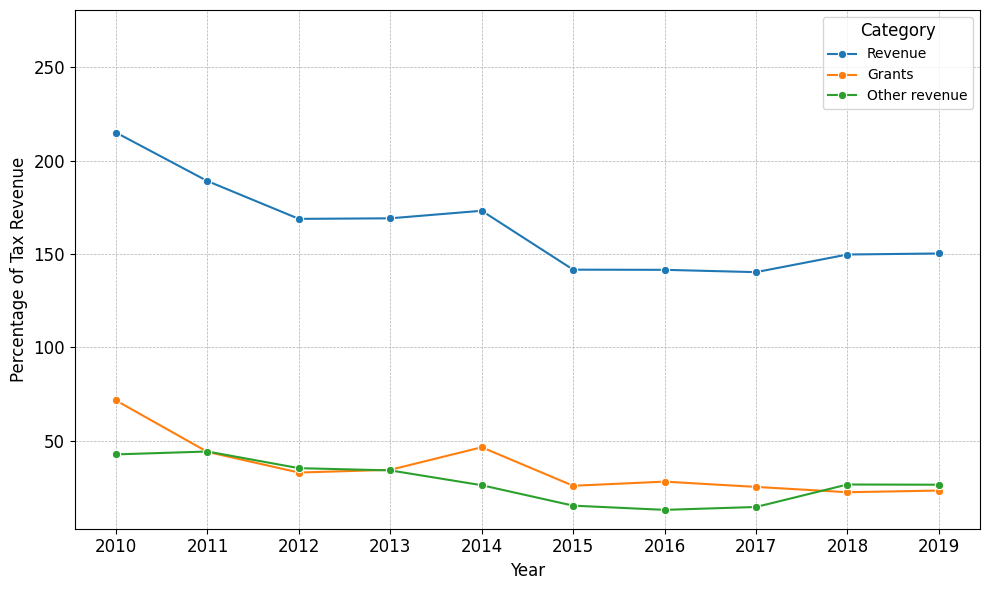

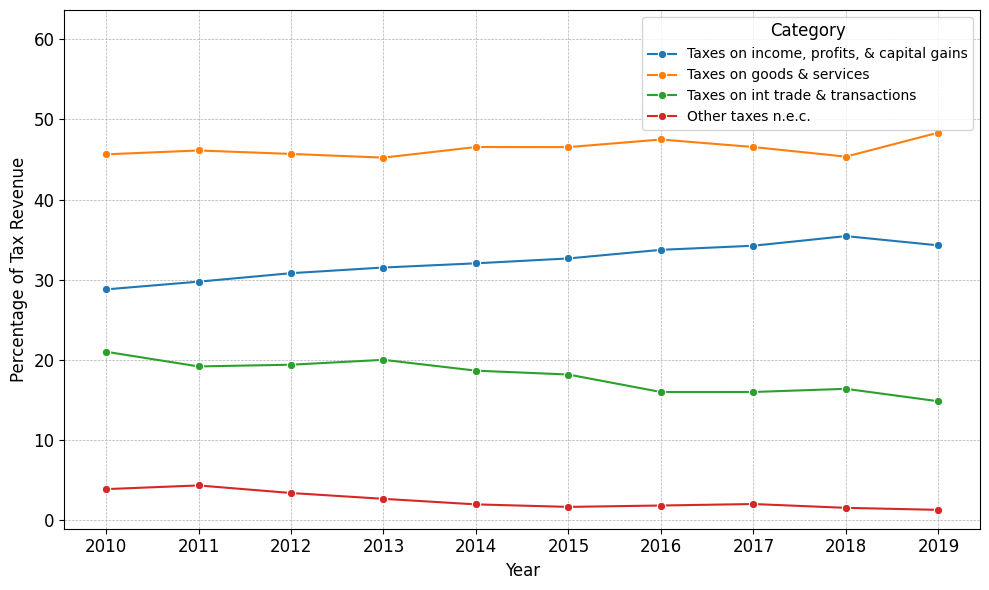

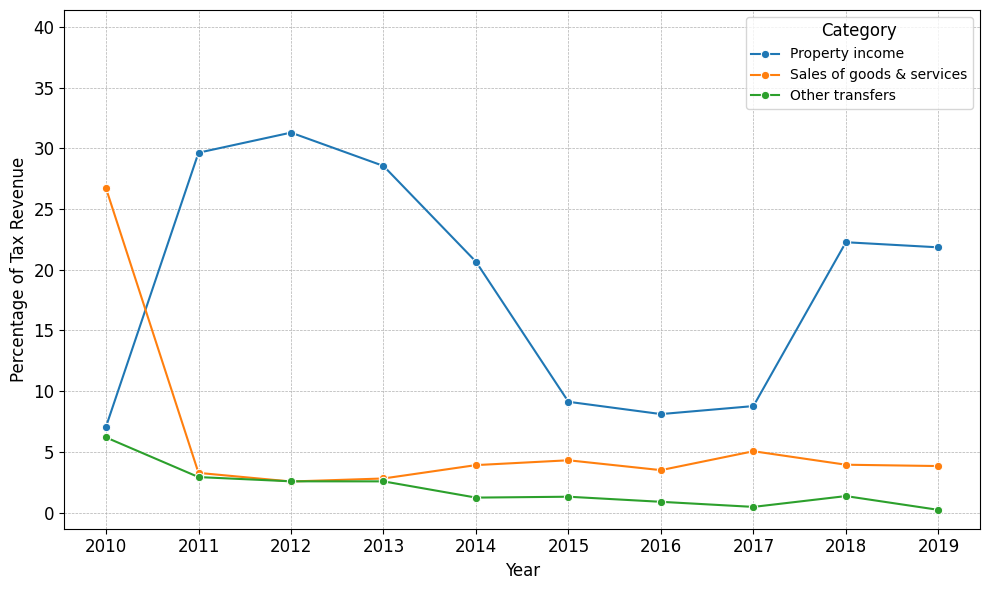

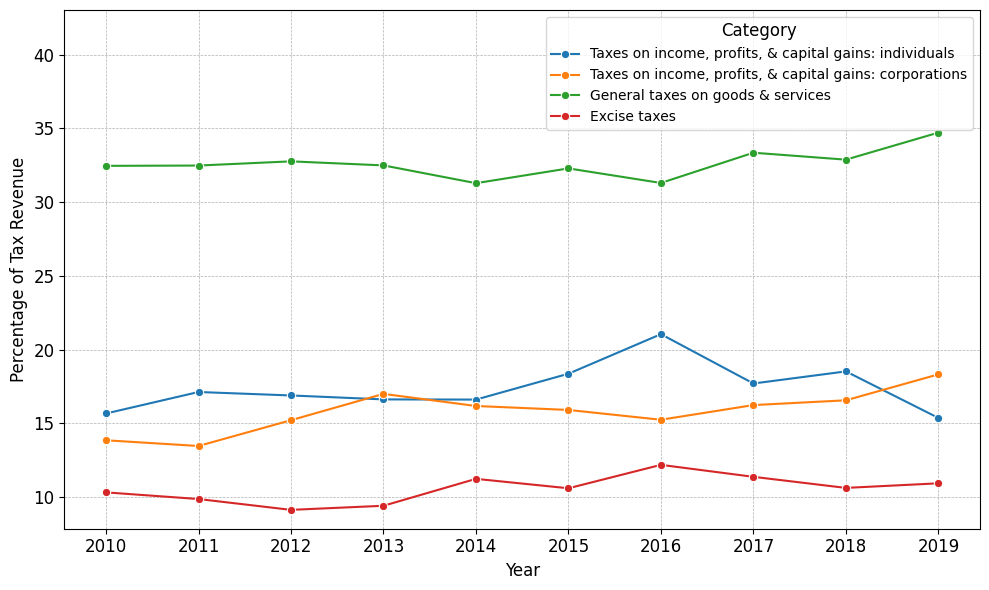

In [72]:
graph(['Revenue', 'Grants', 'Other revenue'])
graph(['Taxes on income, profits, & capital gains', 'Taxes on goods & services', 'Taxes on int trade & transactions', 'Other taxes n.e.c.'])
graph(['Property income', 'Sales of goods & services', 'Other transfers'])
graph(['Taxes on income, profits, & capital gains: individuals', 'Taxes on income, profits, & capital gains: corporations', 'General taxes on goods & services', 'Excise taxes'])